In [2]:
import keras.datasets.fashion_mnist as mnist
import numpy as np
import numpy.random as rd
import sklearn.preprocessing as pp
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig=plt.figure(figsize=(6.5,6.5))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,ha='right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #return fig

# Load data:
(Xtrain,ytrain), (Xtest,ytest) = mnist.load_data()

# Shuffle train data:
idx = rd.permutation(Xtrain.shape[0])
Xtrain = Xtrain[idx]
ytrain = ytrain[idx]

# Image size => 28px x 28px
# Pixel data => [0, 255]
# Train dataset => 60000
# Test dataset => 10000

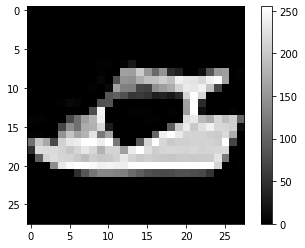

In [3]:
plt.figure()
plt.imshow(Xtrain[0], cmap='gray')
plt.colorbar()

In [4]:
Xtrain = Xtrain / 255
Xtest = Xtest / 255

# Pixel data => [0, 1]

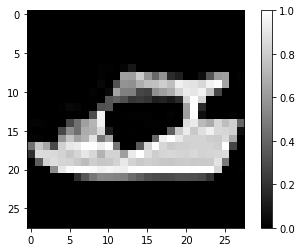

In [5]:
plt.figure()
plt.imshow(Xtrain[0], cmap='gray')
plt.colorbar()

In [6]:
# Pre-process data (cast to float and convert 
# each image to a 784 dimensional vector):
Xtrain = Xtrain * 1.0 # Convert to float
Xtrain = np.reshape(Xtrain, (60000, 784))

Xtest = Xtest * 1.0 # Convert to float
Xtest = np.reshape(Xtest, (10000, 784))

In [7]:
# Normalize data (subtract the data mean and rescale each 
# dimension in order to have unit standard deviation):
print('Train dataset:')
m = np.sort(np.mean(Xtrain, axis=0)) # Sorted data mean
print(m[:5], m[-5:]) # Lowest and highest means
v = np.sort(np.std(Xtrain, axis=0)) # Sorted standard deviation
print(v[:5], v[-5:]) # Lowest and highest values
sc = pp.StandardScaler().fit(Xtrain)
XtrainS = sc.transform(Xtrain)

print('Test dataset:') 
m = np.sort(np.mean(Xtest, axis=0)) # Sorted data mean
print(m[:5], m[-5:]) # Lowest and highest means
v = np.sort(np.std(Xtest, axis=0)) # Sorted standard deviation
print(v[:5], v[-5:]) # Lowest and highest values
sc = pp.StandardScaler().fit(Xtest)
XtestS = sc.transform(Xtest)

Train dataset:
[3.13725490e-06 2.26797386e-05 2.79084967e-05 6.59477124e-05
 9.15032680e-05] [0.62448987 0.62540725 0.63010144 0.63287601 0.63480935]
[0.00036295 0.00097659 0.00221987 0.00301122 0.00363697] [0.39831918 0.40111729 0.4029252  0.40631292 0.40648525]
Test dataset:
[2.35294118e-06 2.50980392e-05 4.00000000e-05 8.00000000e-05
 1.01960784e-04] [0.62163294 0.62312588 0.62885216 0.62917373 0.63106902]
[0.00017536 0.00139069 0.0019359  0.00433194 0.00529046] [0.39809136 0.40117034 0.40327314 0.40624349 0.406394  ]


93.81
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      9000
           1       0.64      0.88      0.74      1000

    accuracy                           0.94     10000
   macro avg       0.81      0.91      0.85     10000
weighted avg       0.95      0.94      0.94     10000



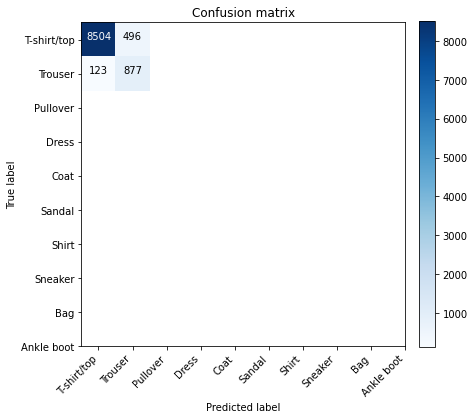

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

ytrain_b = (ytrain == 3) * 1
ytest_b = (ytest == 3) * 1

sgd = SGDClassifier().fit(XtrainS, ytrain_b)
print(100 * sgd.score(XtestS, ytest_b)) # Pre-processed test data + labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_confusion_matrix(cm = confusion_matrix(ytest_b, sgd.predict(XtestS)), classes = classes)
print(classification_report(ytest_b, sgd.predict(XtestS)))


82.41000000000001
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.81      0.57      0.67      1000
           3       0.89      0.79      0.83      1000
           4       0.73      0.76      0.74      1000
           5       0.91      0.90      0.91      1000
           6       0.50      0.68      0.58      1000
           7       0.91      0.90      0.91      1000
           8       0.94      0.93      0.94      1000
           9       0.93      0.92      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.83     10000
weighted avg       0.84      0.82      0.83     10000



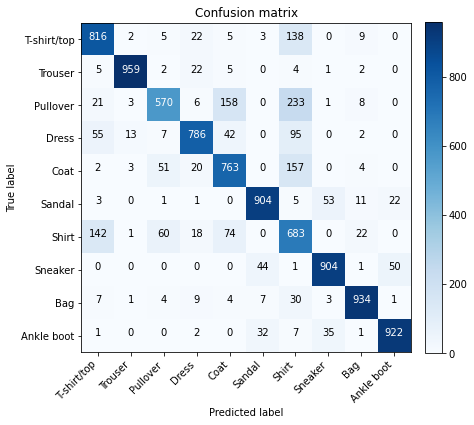

In [11]:
sgd = SGDClassifier().fit(Xtrain, ytrain)
print(100 * sgd.score(Xtest, ytest)) # Pre-processed test data + labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_confusion_matrix(cm = confusion_matrix(ytest, sgd.predict(Xtest)), classes = classes)
print(classification_report(ytest, sgd.predict(Xtest)))